In [ ]:
#### GOOGLE DRIVE SPECIFIC ##########################
#expecting this to  print Found GPU at: /device:GPU:0
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() # keep using v1 syntax 
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

In [1]:
# Load the Drive helper and mount
from google.colab import drive
# This will prompt for authorization.
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [109]:
# Googlepath exists for googledrive finding the files. This is just a location
googlepath = "drive/My Drive/Colab Notebooks/GAN/"
#ALPHA_VANTAGE_KEY = "N4IAIUNSWQLL1RZR" # my backup key.

# Setting the Training Amount
TRAINING_AMOUNT = 15000# Number of steps to train the models
SAVE_STEPS_AMOUNT = 7000# Frequency of which to save the models
PCT_CHANGE_AMOUNT = 0.0# Percent Change Amount
HISTORICAL_DAYS_AMOUNT = 20 # Window to use for historical dayss
DAYS_AHEAD = 1 # How many days ahead to look

In [4]:
!pip3 install yfinance 

     |████████████████████████████████| 6.3 MB 7.5 MB/s 
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


Download data from yfinance

In [88]:
import yfinance as yf
names = "MSFT AAPL AMZN GOOGL TSLA GOOG FB JPM JNJ NVDA  UNH HD V BAC PG MA DIS ADBE NFLX CRM PFE XOM TMO CMCSA CSCO PYPL ACN AVGO COST ABT PEP CVX KO VZ NKE MRK WMT LLY WFC ABBV INTC DHR MCD QCOM T AMD TXN LIN NEE  INTN LOW MDT UNP UPS ORCL PM AMAT C BLK GS NOW FIX BMY SBUX" #NVDA BRK.B JPM UNH JNJ HD PG V BAC MA ADBE DIS CRM NFLX PFE XOM TMO CMCSA CSCO PYPL ACN AVGO COST ABT PEP CVX KO VZ NKE MRK WMT LLY WFC ABBV INTC DHR MCD QCOM T AMD TXN LIN NEE INTU LOW MDT UNP UPS ORCL HON PM MS AMAT C BLK GS NOW RTX BMY SBUX TGT ISRG CVS AMT SCHW BA AMGN GE AXP CAT PLD SPGI IBM ANTM MMM ZTS BKNG DE ADI ADP COP GM SYK CHTR LRCX PNC MDLZ CB TFC GILD MU MMC MO LMT TJX USB CME EL MRNA CSX SHW CCI DUK F CE CI FIS ADSK EW BDX COF EQIX TMUS APD NSC ETN AON ITW SO REGN CL KLAC WM MCO FDX DXCM D HCA FCX BSX FISV EMR NXPI ECL HUM ILMN PGR EOG SPG JCI NOC TEL EXC MSCI ATVI IDXX DG SNPS XLNX CMG ROP AIG PSA ALGN APH  NFO CDNS TROW IQV VRTX A BK CARR NEM EBAY MET GD SLB MCHP APTV FTNT KMB TT DOW ORLY LHX CNC SIVB DLR MAR PRU CTSH DD PH MPC MSI PX TCH AEP ROST EA AZO HLT O BIIB SYY BAX PAYX TRV FRC SRE ROK GIS HPQ CTAS PPG STZ GPN SBAC IFF ADM RMD YUM STT WBA WELL OTIS DFS CBRE MTD WMB CTVA AMP AFL MCK MNST TDG VRSK KEYS XEL PSX FAST CMI ALL ENPH AVB AJG EFX ANSS NUE ODFL KMI AME CPRT ALB VLO PEG DHI ZBRA PCAR AWK SWK WST ETSY FITB BLL BBY WLTW GLW EQR LEN LUV ANET KR OXY ARE GNRC ES SYF OKE WEC KSU RSG FTV DAL LH ZBH URI WY IT DVN ED SWKS EXR VMC DLTR EXPE NTRS HSY CDW MLM HIG TSCO EIX DOV LYB TSN VFC KMX KHC HBAN NDAQ MPWR IR XYL PAYC MAA KEY RF STE VRSN HES ESS TER TYL POOL CHD PPL CERN DTE DRE AEE ULTA VIAC TTWO CTLT WAT EXPD TRMB GRMN CZR FE GWW STX HAL CFG HPE TDY VTR ETR NTAP MTB BR CLX MKC COOm BKR PKIBBWI FLT TECH DRI IP CRL GPC AMCR RCL CE J RJF DPZ ABC FANG HOLX PEAK CINF AVY CCL WAB MGM DGX WDC AKAM IEX QRVO VTRS CMS NVR PFG TXT CTRA BXP AES JBHT UAL PWR CDAY ABMD BIO K MAS TFX CNP LKQ UDR EMN AAP CAG LYV OMC BRO EVRG IPG NLOK MKTX CAH KIM FBHS LUMN WHR IRM LNT AAL CBOE CF SJM FMC FFIV FOXA BF.B WRK MRO RHI PHM LVS LNC TPR PKG MOS PTC HST HAS LDOS ATO HWM PNR HRL INCY CHRW CMA XRAY SNA ALLE JKHY L REG WRB BWA APA HSIC RE CTXS ZION AOS JNPR WYNN UHS NI BEN MHK SEE NCLH AIZ NWSA NWL DISH FRT TAP OGN IVZ GL PVH PENN NRG DXC LW CPB DISCK ROL PBCT NLSN HII PNW WU DVA VNO ALK HBI RL IPGP LEG FOX GPS UAA DISCA UA NWS" 
#AAPL MSFT AMZN TSLA GOOG  FB JPM JNJ NVDA  UNH HD V BAC PG MA DIS ADBE NFLX CRM PFE XOM TMO CMCSA CSCO PYPL ACN AVGO COST ABT PEP CVX KO VZ NKE MRK WMT LLY WFC ABBV INTC DHR MCD QCOM T AMD TXN LIN NEE  INTN LOW MDT UNP UPS ORCL PM AMAT C BLK GS NOW FIX BMY SBUX, NGR ALGN VRTX WYNN MU DHI PHM"#BA TGT ISR GC V S AMT SCHW BA AMGN GE AXP CAT PLD SPG IBM ANTM MMM ZTS BKNG DE ADI ADP COP GM SYK CHTR LRCX PNC MDLZ CB TFC GILD MU MMC MO LMT TJX USB CME ELM RNA CSX SHW CCI DUK F ICE"# ^GSPC company symbols
names_list = names.split()
for name in names_list:
    
    df = yf.download(name,start="2014-01-01",end="2021-12-01")#end="2018-01-01")
    df=df.rename({'Date':'Date', 'Open':'open', 'High':'high', 'Low':'low', 'Close':'close', 'Volume':'volume'}, axis=1)
    del df["Adj Close"]#drop the column
    #del df["volume"]#drop the column
    storage_name = name + '.csv'
    print('You are now downloding ',storage_name)
    
   # df.to_csv(storage_name, index=False)
    df.to_csv(f"{googlepath}stock_data/{storage_name}")

[*********************100%***********************]  1 of 1 completed
You are now downloding  MSFT.csv
[*********************100%***********************]  1 of 1 completed
You are now downloding  AAPL.csv
[*********************100%***********************]  1 of 1 completed
You are now downloding  AMZN.csv
[*********************100%***********************]  1 of 1 completed
You are now downloding  GOOGL.csv
[*********************100%***********************]  1 of 1 completed
You are now downloding  TSLA.csv
[*********************100%***********************]  1 of 1 completed
You are now downloding  GOOG.csv
[*********************100%***********************]  1 of 1 completed
You are now downloding  FB.csv
[*********************100%***********************]  1 of 1 completed
You are now downloding  JPM.csv
[*********************100%***********************]  1 of 1 completed
You are now downloding  JNJ.csv
[*********************100%***********************]  1 of 1 completed
You are now down

Technical indicators

In [102]:
# Calculate technical indicators
def get_technical_indicators(data):
    # Create 7 and 21 days Moving Average
    data['MA7'] = data.iloc[:,3].rolling(window=7).mean()
    data['MA21'] = data.iloc[:,3].rolling(window=21).mean()

    # # Create MACD
    # data['MACD'] = data.iloc[:,4].ewm(span=26).mean() - data.iloc[:,1].ewm(span=12,adjust=False).mean()

    # Create Bollinger Bands
    data['20SD'] = data.iloc[:, 3].rolling(20).std()
    data['upper_band'] = data['MA21'] + (data['20SD'] * 2)
    data['lower_band'] = data['MA21'] - (data['20SD'] * 2)

    # # Create Exponential moving average
    data['EMA'] = data.iloc[:,3].ewm(com=0.5).mean()

    # # Create LogMomentum
    # data['logmomentum'] = np.log(data.iloc[:,4] - 1)

    return data


Helper Functions to Plot: Define the Confusion Matrix


In [103]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(i, j, cm[j, i],
                 horizontalalignment="center",
                 color="black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()



initialising GAN





In [110]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np
import matplotlib.pyplot as plt
import os

SEED = 42
tf.set_random_seed(SEED)

class GAN():

    def sample_Z(self, batch_size, n):
        return np.random.uniform(-1., 1., size=(batch_size, n))

    def __init__(self, num_features, num_historical_days, generator_input_size=200, is_train=True):
        def get_batch_norm_with_global_normalization_vars(size):
            v = tf.Variable(tf.ones([size]), dtype=tf.float32)
            m = tf.Variable(tf.ones([size]), dtype=tf.float32)
            beta = tf.Variable(tf.ones([size]), dtype=tf.float32)
            gamma = tf.Variable(tf.ones([size]), dtype=tf.float32)
            return v, m, beta, gamma

        self.X = tf.compat.v1.placeholder(tf.float32, shape=[None, num_historical_days, num_features])
        X = tf.reshape(self.X, [-1, num_historical_days, 1, num_features])
        self.Z = tf.compat.v1.placeholder(tf.float32, shape=[None, generator_input_size])

        generator_output_size = num_features*num_historical_days
        with tf.variable_scope("generator"):
            W1 = tf.Variable(tf.truncated_normal([generator_input_size, generator_output_size*10]))
            b1 = tf.Variable(tf.truncated_normal([generator_output_size*10]))

            h1 = tf.nn.sigmoid(tf.matmul(self.Z, W1) + b1)

            W2 = tf.Variable(tf.truncated_normal([generator_output_size*10, generator_output_size*5]))
            b2 = tf.Variable(tf.truncated_normal([generator_output_size*5]))

            h2 = tf.nn.sigmoid(tf.matmul(h1, W2) + b2)

            W3 = tf.Variable(tf.truncated_normal([generator_output_size*5, generator_output_size]))
            b3 = tf.Variable(tf.truncated_normal([generator_output_size]))

            g_log_prob = tf.matmul(h2, W3) + b3
            g_log_prob = tf.reshape(g_log_prob, [-1, num_historical_days, 1, num_features])
            self.gen_data = tf.reshape(g_log_prob, [-1, num_historical_days, num_features])

            theta_G = [W1, b1, W2, b2, W3, b3]



        with tf.variable_scope("discriminator"):
            #[filter_height, filter_width, in_channels, out_channels]
            k1 = tf.Variable(tf.truncated_normal([3, 1, num_features, 32],
                stddev=0.1,seed=SEED, dtype=tf.float32))
            b1 = tf.Variable(tf.zeros([32], dtype=tf.float32))

            v1, m1, beta1, gamma1 = get_batch_norm_with_global_normalization_vars(32)

            k2 = tf.Variable(tf.truncated_normal([3, 1, 32, 64],
                stddev=0.1,seed=SEED, dtype=tf.float32))
            b2 = tf.Variable(tf.zeros([64], dtype=tf.float32))

            v2, m2, beta2, gamma2 = get_batch_norm_with_global_normalization_vars(64)

            k3 = tf.Variable(tf.truncated_normal([3, 1, 64, 128],
                stddev=0.1,seed=SEED, dtype=tf.float32))
            b3 = tf.Variable(tf.zeros([128], dtype=tf.float32))

            v3, m3, beta3, gamma3 = get_batch_norm_with_global_normalization_vars(128)

            W1 = tf.Variable(tf.truncated_normal([18*1*128, 128]))
            b4 = tf.Variable(tf.truncated_normal([128]))

            v4, m4, beta4, gamma4 = get_batch_norm_with_global_normalization_vars(128)

            W2 = tf.Variable(tf.truncated_normal([128, 1]))

            theta_D = [k1, b1, k2, b2, k3, b3, W1, b4, W2]

        def discriminator(X):
            conv = tf.nn.conv2d(X,k1,strides=[1, 1, 1, 1],padding='SAME')
            relu = tf.nn.relu(tf.nn.bias_add(conv, b1))
            pool = relu
            if is_train:
                pool = tf.nn.dropout(pool, keep_prob = 0.8)

            conv = tf.nn.conv2d(pool, k2,strides=[1, 1, 1, 1],padding='SAME')
            relu = tf.nn.relu(tf.nn.bias_add(conv, b2))
            pool = relu
            if is_train:
                pool = tf.nn.dropout(pool, keep_prob = 0.8)

            conv = tf.nn.conv2d(pool, k3, strides=[1, 1, 1, 1], padding='VALID')
            relu = tf.nn.relu(tf.nn.bias_add(conv, b3))
            if is_train:
                relu = tf.nn.dropout(relu, keep_prob=0.8)


            flattened_convolution_size = int(relu.shape[1]) * int(relu.shape[2]) * int(relu.shape[3])
            flattened_convolution = features = tf.reshape(relu, [-1, flattened_convolution_size])

            if is_train:
                flattened_convolution =  tf.nn.dropout(flattened_convolution, keep_prob=0.8)

            h1 = tf.nn.relu(tf.matmul(flattened_convolution, W1) + b4)

            D_logit = tf.matmul(h1, W2)
            D_prob = tf.nn.sigmoid(D_logit)
            return D_prob, D_logit, features

        D_real, D_logit_real, self.features = discriminator(X)
        D_fake, D_logit_fake, _ = discriminator(g_log_prob)


        D_loss_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=D_logit_real, labels=tf.ones_like(D_logit_real)))
        D_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=D_logit_fake, labels=tf.zeros_like(D_logit_fake)))
        self.D_l2_loss = (0.0001 * tf.add_n([tf.nn.l2_loss(t) for t in theta_D]) / len(theta_D))
        self.D_loss = D_loss_real + D_loss_fake + self.D_l2_loss
        self.G_l2_loss = (0.00001 * tf.add_n([tf.nn.l2_loss(t) for t in theta_G]) / len(theta_G))
        self.G_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=D_logit_fake, labels=tf.ones_like(D_logit_fake))) + self.G_l2_loss


        self.D_solver = tf.train.AdamOptimizer(learning_rate=0.000001).minimize(self.D_loss, var_list=theta_D)
        self.G_solver = tf.train.AdamOptimizer(learning_rate=0.000001).minimize(self.G_loss, var_list=theta_G)


Trainning GAN

INFO:tensorflow:Restoring parameters from drive/My Drive/Colab Notebooks/GAN/models/gan.ckpt-499


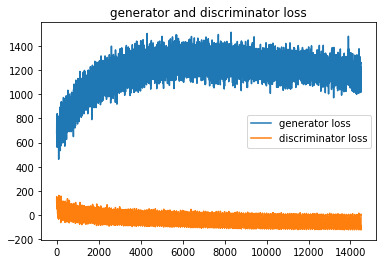

In [111]:

import os
import pandas as pd
import random
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

random.seed(42)
class TrainGan:

    def __init__(self, num_historical_days, batch_size=128):
        self.batch_size = batch_size
        self.data = []

        # Google Drive Method
        files = [f"{googlepath}stock_data/{f}" for f in os.listdir(f"{googlepath}stock_data")]
      
        for file in files:
            ###print(file)
            #Read in file -- note that parse_dates will be need later
            df = pd.read_csv(file, index_col='Date', parse_dates=True)
            df = get_technical_indicators(df).dropna()
            df = df.reset_index(drop=True)
            df = df[['open','high','low','close', 'MA7', 'MA21', 'upper_band', 'lower_band', 'EMA']]#, 'MACD', '20SD', 'upper_band', 'lower_band', 'EMA', 'logmomentum']]

            #Normilize using a of size num_historical_days
            df = ((df -
            df.rolling(num_historical_days).mean().shift(-num_historical_days))
            /(df.rolling(num_historical_days).max().shift(-num_historical_days)
            -df.rolling(num_historical_days).min().shift(-num_historical_days)))

            #Drop days that we don't have data for
            df = df.dropna()
            
            #Hold out 500 days for testing
            df = df[250:]

            for i in range(num_historical_days, len(df), num_historical_days):
                self.data.append(df.values[i-num_historical_days:i])

        self.gan = GAN(num_features= 9, num_historical_days=num_historical_days,
                        generator_input_size=200)

    def random_batch(self, batch_size=128):
        batch = []
        while True:
            batch.append(random.choice(self.data))
            if (len(batch) == batch_size):
                yield batch
                batch = []

    def train(self, print_steps=100, display_data=100, save_steps=SAVE_STEPS_AMOUNT):
        if not os.path.exists(f'{googlepath}models'):
            os.makedirs(f'{googlepath}models')
        sess = tf.Session()
        
        G_loss = 0
        D_loss = 0
        G_l2_loss = 0
        D_l2_loss = 0
        sess.run(tf.global_variables_initializer())
        saver = tf.train.Saver()
        currentStep = "0"
        
        g_loss_array = []
        d_loss_array = []
        
        if os.path.exists(f'{googlepath}models/checkpoint'):
                with open(f'{googlepath}models/checkpoint', 'rb') as f:
                    model_name = next(f).split('"'.encode())[1]
                filename = "{}models/{}".format(googlepath, model_name.decode())
                currentStep = filename.split("-")[1]
                new_saver = tf.train.import_meta_graph('{}.meta'.format(filename))
                new_saver.restore(sess, "{}".format(filename))

        for i, X in enumerate(self.random_batch(self.batch_size)):

            
            
            
            if i % 1 == 0:
                _, D_loss_curr, D_l2_loss_curr = sess.run([self.gan.D_solver, self.gan.D_loss, self.gan.D_l2_loss], feed_dict=
                        {self.gan.X:X, self.gan.Z:self.gan.sample_Z(self.batch_size, 200)})
                D_loss += D_loss_curr
                D_l2_loss += D_l2_loss_curr
            if i % 1 == 0:
                _, G_loss_curr, G_l2_loss_curr = sess.run([self.gan.G_solver, self.gan.G_loss, self.gan.G_l2_loss],
                        feed_dict={self.gan.Z:self.gan.sample_Z(self.batch_size, 200)})
                G_loss += G_loss_curr
                G_l2_loss += G_l2_loss_curr
                
            g_loss_array.append(G_loss_curr - G_l2_loss)
            d_loss_array.append(D_loss_curr - D_l2_loss)
            
            
            if (i+1) % print_steps == 0:
                ###print('Step={} D_loss={}, G_loss={}'.format(i + int(currentStep), D_loss/print_steps - D_l2_loss/print_steps, G_loss/print_steps - G_l2_loss/print_steps))
                G_loss = 0
                D_loss = 0
                G_l2_loss = 0
                D_l2_loss = 0
            if (i+1) % save_steps == 0:
                saver.save(sess, f'{googlepath}/models/gan.ckpt', i + int(currentStep))
            
            # end training at training_amount epochs
            if ((i + int(currentStep)) > TRAINING_AMOUNT):
                
                ###print("Reached {} epochs for GAN".format(i + int(currentStep)))
                sess.close()
                
                axisX = np.arange(0,len(g_loss_array),1)
                plt.plot(axisX, g_loss_array, label='generator loss')
                plt.plot(axisX, d_loss_array, label='discriminator loss')
                plt.legend()
                plt.title('generator and discriminator loss')
                plt.show()
                
                break

            # if (i+1) % display_data == 0:
            #     print('Generated Data')
            #     print(sess.run(self.gan.gen_data, feed_dict={self.gan.Z:self.gan.sample_Z(1, 200)}))
            #     print('Real Data')
            #     print(X[0])



tf.compat.v1.reset_default_graph()
gan = TrainGan(HISTORICAL_DAYS_AMOUNT, 128)
gan.train()



Initializing the CNN


In [112]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

import numpy as np
import matplotlib.pyplot as plt
import os

SEED = 42
tf.set_random_seed(SEED)

class CNN():

    def __init__(self, num_features, num_historical_days, is_train=True):
      
        self.X = tf.compat.v1.placeholder(tf.float32, shape=[None, num_historical_days, num_features])
        X = tf.reshape(self.X, [-1, num_historical_days, 1, num_features])
        self.Y = tf.compat.v1.placeholder(tf.int32, shape=[None, 2])
        self.keep_prob = tf.compat.v1.placeholder(tf.float32, shape=[])

        with tf.variable_scope("cnn"):
            #[filter_height, filter_width, in_channels, out_channels]
            k1 = tf.Variable(tf.truncated_normal([3, 1, num_features, 16],
                stddev=0.1,seed=SEED, dtype=tf.float32))
            b1 = tf.Variable(tf.zeros([16], dtype=tf.float32))

            conv = tf.nn.conv2d(X,k1,strides=[1, 1, 1, 1],padding='SAME')
            relu = tf.nn.relu(tf.nn.bias_add(conv, b1))
            if is_train:
                relu = tf.nn.dropout(relu, keep_prob = self.keep_prob)
            ###print(relu)


            k2 = tf.Variable(tf.truncated_normal([3, 1, 16, 32],
                stddev=0.1,seed=SEED, dtype=tf.float32))
            b2 = tf.Variable(tf.zeros([32], dtype=tf.float32))
            conv = tf.nn.conv2d(relu, k2,strides=[1, 1, 1, 1],padding='SAME')
            relu = tf.nn.relu(tf.nn.bias_add(conv, b2))
            if is_train:
                relu = tf.nn.dropout(relu, keep_prob = self.keep_prob)
            ###print(relu)


            k3 = tf.Variable(tf.truncated_normal([3, 1, 32, 64],
                stddev=0.1,seed=SEED, dtype=tf.float32))
            b3 = tf.Variable(tf.zeros([64], dtype=tf.float32))
            conv = tf.nn.conv2d(relu, k3, strides=[1, 1, 1, 1], padding='VALID')
            relu = tf.nn.relu(tf.nn.bias_add(conv, b3))
            if is_train:
                relu = tf.nn.dropout(relu, keep_prob=self.keep_prob)
            ###print(relu)


            flattened_convolution_size = int(relu.shape[1]) * int(relu.shape[2]) * int(relu.shape[3])
            ###print(flattened_convolution_size)
            flattened_convolution = features = tf.reshape(relu, [-1, flattened_convolution_size])

            if is_train:
                flattened_convolution =  tf.nn.dropout(flattened_convolution, keep_prob=self.keep_prob)

            W1 = tf.Variable(tf.truncated_normal([18*1*64, 32]))
            b4 = tf.Variable(tf.truncated_normal([32]))
            h1 = tf.nn.relu(tf.matmul(flattened_convolution, W1) + b4)


            W2 = tf.Variable(tf.truncated_normal([32, 2]))
            logits = tf.matmul(h1, W2)

            self.accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(self.Y, 1), tf.argmax(logits, 1)), tf.float32))
            self.confusion_matrix = tf.confusion_matrix(tf.argmax(self.Y, 1), tf.argmax(logits, 1))
            tf.summary.scalar('accuracy', self.accuracy)
            theta_D = [k1, b1, k2, b2, k3, b3, W1, b4, W2]           

        self.loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=self.Y, logits=logits))
        tf.summary.scalar('loss', self.loss)

        self.optimizer = tf.train.AdamOptimizer(learning_rate=0.00001).minimize(self.loss)
        self.summary = tf.summary.merge_all()



Training the CNN


INFO:tensorflow:Restoring parameters from drive/My Drive/Colab Notebooks/GAN/cnn_models/cnn.ckpt-499
[[5976 1540]
 [1227 5747]]
Normalized confusion matrix
[[0.79510378 0.20489622]
 [0.1759392  0.8240608 ]]


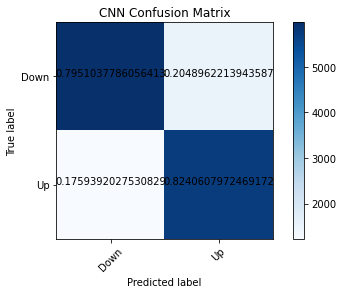

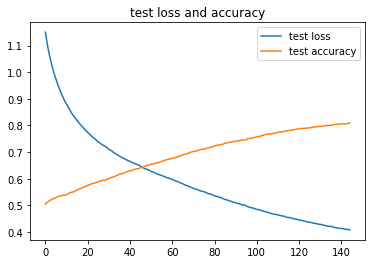

In [113]:
import os
import pandas as pd
import random
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import xgboost as xgb
#from sklearn.externals import joblib
from sklearn.metrics import confusion_matrix

random.seed(42)

class TrainCNN:

    def __init__(self, num_historical_days, days=1, pct_change=0):
        self.data = []
        self.labels = []
        self.test_data = []
        self.test_labels = []
        self.cnn = CNN(num_features=9, num_historical_days=num_historical_days, is_train=False)

        # Google Drive Method
        files = [f"{googlepath}stock_data/{f}" for f in os.listdir(f"{googlepath}stock_data")]
    
        for file in files:
            ###print(file)
            #Read in file -- note that parse_dates will be need later
            df = pd.read_csv(file, index_col='Date', parse_dates=True)
            df = get_technical_indicators(df).dropna()
            df = df.reset_index(drop=True)
            df = df[['open','high','low','close', 'MA7', 'MA21', 'upper_band', 'lower_band', 'EMA']]#, 'MACD', '20SD', 'upper_band', 'lower_band', 'EMA', 'logmomentum']]
            # data for new column labels that will use the pct_change of the closing data.
            # pct_change measure change between current and prior element. Map these into a 1x2
            # array to show if the pct_change > (our desired threshold) or less than.
            labels = df.close.pct_change(days).map(lambda x: [int(x > pct_change/100.0), int(x <= pct_change/100.0)])
            # rolling normalization. (df - df.mean) / (df.max - df.min)
            df = ((df -
            df.rolling(num_historical_days).mean().shift(-num_historical_days))
            /(df.rolling(num_historical_days).max().shift(-num_historical_days)
            -df.rolling(num_historical_days).min().shift(-num_historical_days)))
            df['labels'] = labels

            # doing pct_change will give some rows (like first row) a NaN value. Drop that.
            df = df.dropna()

            # Do the testing data split
            test_df = df[:250]
            df = df[250:]

            # get the predictors of the dataframe
            data = df[['open','high','low','close','MA7', 'MA21', 'upper_band', 'lower_band', 'EMA']].values#, 'MACD', '20SD', 'upper_band', 'lower_band', 'EMA', 'logmomentum']].values

            # the response value
            labels = df['labels'].values
            #print(labels)

            # start at num_historical_days and iterate the full length of the training
            # data at intervals of num_historical_days
            for i in range(num_historical_days, len(df), num_historical_days):
                # split the df into arrays of length num_historical_days and append
                # to data, i.e. array of df[curr - num_days : curr] -> a batch of values
                self.data.append(data[i-num_historical_days:i])

                # appending if price went up or down in curr day of "i" we are looking
                # at
                self.labels.append(labels[i-1])
            
            # do same for test data
            data = test_df[['open','high','low','close','MA7', 'MA21', 'upper_band', 'lower_band', 'EMA']].values#, 'MACD', '20SD', 'upper_band', 'lower_band', 'EMA', 'logmomentum']].values
            labels = test_df['labels'].values
            for i in range(num_historical_days, len(test_df), 1):
                self.test_data.append(data[i-num_historical_days:i])
                self.test_labels.append(labels[i-1])

    # a function to get a random_batch of data.
    def random_batch(self, batch_size=128):
        batch = []
        labels = []
        # zip concatenates each array index of both arrays together
        data = list(zip(self.data, self.labels))
        i = 0
        while True:
            i+= 1
            while True:
                # pick a random array, i.e. range of days, from data
                d = random.choice(data)
                # balance the data with equal number of positive pct_change
                # and negative pct_change
                if(d[1][0]== int(i%2)):
                    break
            batch.append(d[0])  # append the range of days we got to batch
            labels.append(d[1])  # append the label of that range of data we got
            if (len(batch) == batch_size):
                yield batch, labels
                batch = []
                labels = []

    def train(self, print_steps=100, display_steps=100, save_steps=SAVE_STEPS_AMOUNT, batch_size=128, keep_prob=0.6):
        if not os.path.exists(f'{googlepath}cnn_models'):
            os.makedirs(f'{googlepath}cnn_models')
        if not os.path.exists(f'{googlepath}logs'):
            os.makedirs(f'{googlepath}logs')
        if os.path.exists(f'{googlepath}logs/train'):
            for file in [os.path.join(f'{googlepath}logs/train/', f) for f in os.listdir(f'{googlepath}logs/train/')]:
                os.remove(file)
        if os.path.exists(f'{googlepath}logs/test'):
            for file in [os.path.join(f'{googlepath}logs/test/', f) for f in os.listdir(f'{googlepath}logs/test')]:
                os.remove(file)

        sess = tf.Session()
        loss = 0
        l2_loss = 0
        accuracy = 0
        saver = tf.train.Saver()
        train_writer = tf.summary.FileWriter(f'{googlepath}/logs/train')
        test_writer = tf.summary.FileWriter(f'{googlepath}/logs/test')
        sess.run(tf.global_variables_initializer())
        
        test_loss_array = []
        test_accuracy_array = []
        currentStep = "0"
        
        if os.path.exists(f'{googlepath}cnn_models/checkpoint'):
                with open(f'{googlepath}cnn_models/checkpoint', 'rb') as f:
                    model_name = next(f).split('"'.encode())[1]
                filename = "{}cnn_models/{}".format(googlepath, model_name.decode())
                currentStep = filename.split("-")[1]
                new_saver = tf.train.import_meta_graph('{}.meta'.format(filename))
                new_saver.restore(sess, "{}".format(filename))

        for i, [X, y] in enumerate(self.random_batch(batch_size)):

          
            _, loss_curr, accuracy_curr = sess.run([self.cnn.optimizer, self.cnn.loss, self.cnn.accuracy], feed_dict=
                    {self.cnn.X:X, self.cnn.Y:y, self.cnn.keep_prob:keep_prob})
            loss += loss_curr
            accuracy += accuracy_curr
            if (i+1) % print_steps == 0:
                ###print('Step={} loss={}, accuracy={}'.format(i + int(currentStep), loss/print_steps, accuracy/print_steps))
                loss = 0
                l2_loss = 0
                accuracy = 0
                test_loss, test_accuracy, confusion_matrix = sess.run([self.cnn.loss, self.cnn.accuracy, self.cnn.confusion_matrix], feed_dict={self.cnn.X:self.test_data, self.cnn.Y:self.test_labels, self.cnn.keep_prob:1})
                test_loss_array.append(test_loss)
                test_accuracy_array.append(test_accuracy)
                ###print("Test loss = {}, Test accuracy = {}".format(test_loss, test_accuracy))
            if (i+1) % save_steps == 0:
                saver.save(sess,  f'{googlepath}cnn_models/cnn.ckpt', i)

            if (i+1) % display_steps == 0:
                summary = sess.run(self.cnn.summary, feed_dict=
                    {self.cnn.X:X, self.cnn.Y:y, self.cnn.keep_prob:keep_prob})
                train_writer.add_summary(summary, i)
                summary = sess.run(self.cnn.summary, feed_dict={
                    self.cnn.X:self.test_data, self.cnn.Y:self.test_labels, self.cnn.keep_prob:1})
                test_writer.add_summary(summary, i)
            
            # end training at training_amount epochs
            if (i + int(currentStep)) > TRAINING_AMOUNT:
                ###print("Reached {} epochs for CNN".format(i + int(currentStep)))
                sess.close()
                print(confusion_matrix)
                plot_confusion_matrix(confusion_matrix, ['Down', 'Up'], normalize=True, title="CNN Confusion Matrix")
                
                axisX = np.arange(0,len(test_loss_array),1)
                plt.plot(axisX, test_loss_array, label='test loss')
                plt.plot(axisX, test_accuracy_array, label='test accuracy')
                plt.legend()
                plt.title('test loss and accuracy')
                plt.show()

                break


tf.compat.v1.reset_default_graph()
cnn = TrainCNN(num_historical_days=HISTORICAL_DAYS_AMOUNT, days=DAYS_AHEAD, pct_change=PCT_CHANGE_AMOUNT)
cnn.train()


Train XGB Boost


INFO:tensorflow:Restoring parameters from drive/My Drive/Colab Notebooks/GAN/models/gan.ckpt-14498
[0]	train-mlogloss:0.692213	test-mlogloss:0.692698
Multiple eval metrics have been passed: 'test-mlogloss' will be used for early stopping.

Will train until test-mlogloss hasn't improved in 100 rounds.
[1]	train-mlogloss:0.691278	test-mlogloss:0.692312
[2]	train-mlogloss:0.690392	test-mlogloss:0.691999
[3]	train-mlogloss:0.689388	test-mlogloss:0.691408
[4]	train-mlogloss:0.688487	test-mlogloss:0.691076
[5]	train-mlogloss:0.687581	test-mlogloss:0.690616
[6]	train-mlogloss:0.686674	test-mlogloss:0.690231
[7]	train-mlogloss:0.685673	test-mlogloss:0.689698
[8]	train-mlogloss:0.684957	test-mlogloss:0.689285
[9]	train-mlogloss:0.683832	test-mlogloss:0.688583
[10]	train-mlogloss:0.683026	test-mlogloss:0.688051
[11]	train-mlogloss:0.682063	test-mlogloss:0.687619
[12]	train-mlogloss:0.681353	test-mlogloss:0.687479
[13]	train-mlogloss:0.680505	test-mlogloss:0.686987
[14]	train-mlogloss:0.679514	te

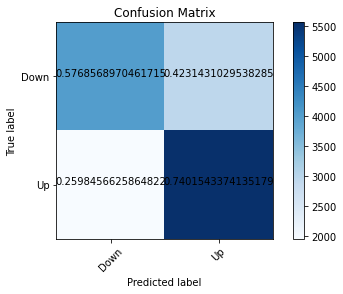

In [114]:
import os
import pandas as pd
import random
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import xgboost as xgb
import joblib
#from sklearn.externals import joblib
from sklearn.metrics import confusion_matrix

class TrainXGBBoost:

    def __init__(self, num_historical_days, days=10, pct_change=0):
        self.data = []
        self.labels = []
        self.test_data = []
        self.test_labels = []
        
        assert os.path.exists(f'{googlepath}models/checkpoint')
        gan = GAN(num_features=9, num_historical_days=num_historical_days,
                        generator_input_size=200, is_train=False)
        with tf.Session() as sess:
            sess.run(tf.global_variables_initializer())
            saver = tf.train.Saver()
            if os.path.exists(f'{googlepath}models/checkpoint'):
                    
                    with open(f'{googlepath}models/checkpoint', 'rb') as f:
                        model_name = next(f).split('"'.encode())[1]
                    filename = "{}models/{}".format(googlepath, model_name.decode())
                    currentStep = filename.split("-")[1]
                    new_saver = tf.train.import_meta_graph('{}.meta'.format(filename))
                    new_saver.restore(sess, "{}".format(filename))
            files = [os.path.join(f'{googlepath}stock_data', f) for f in os.listdir(f'{googlepath}/stock_data')]
            for file in files:
                ###print(file)
                #Read in file -- note that parse_dates will be need later
                df = pd.read_csv(file, index_col='Date', parse_dates=True)
                df = get_technical_indicators(df).dropna()
                df = df.reset_index(drop=True)
                df = df[['open','high','low','close', 'MA7', 'MA21', 'upper_band', 'lower_band', 'EMA']]#, 'MACD', '20SD', 'upper_band', 'lower_band', 'EMA', 'logmomentum']]

                #Normilize using a of size num_historical_days
                labels = df.close.pct_change(days).map(lambda x: int(x > pct_change/100.0))
                df = ((df -
                df.rolling(num_historical_days).mean().shift(-num_historical_days))
                /(df.rolling(num_historical_days).max().shift(-num_historical_days)
                -df.rolling(num_historical_days).min().shift(-num_historical_days)))
                df['labels'] = labels

                df = df.dropna()

                #Hold out the testing data
                test_df = df[:250]
                df = df[250:]

                data = df[['open','high','low','close', 'MA7', 'MA21', 'upper_band', 'lower_band', 'EMA']].values#, 'MACD', '20SD', 'upper_band', 'lower_band', 'EMA', 'logmomentum']].values
                labels = df['labels'].values
                for i in range(num_historical_days, len(df), num_historical_days):
                    features = sess.run(gan.features, feed_dict={gan.X:[data[i-num_historical_days:i]]})
                    self.data.append(features[0])
#                     print(features[0])
                    self.labels.append(labels[i-1])
                data = test_df[['open','high','low','close', 'MA7', 'MA21', 'upper_band', 'lower_band', 'EMA']].values#, 'MACD', '20SD', 'upper_band', 'lower_band', 'EMA', 'logmomentum']].values
                labels = test_df['labels'].values
                for i in range(num_historical_days, len(test_df), 1):
                    features = sess.run(gan.features, feed_dict={gan.X:[data[i-num_historical_days:i]]})
                    self.test_data.append(features[0])
                    self.test_labels.append(labels[i-1])



    def train(self):
        params = {}
        params['objective'] = 'multi:softprob'
        params['eta'] = 0.01
        params['num_class'] = 2
        params['max_depth'] = 20
        params['subsample'] = 0.05
        params['colsample_bytree'] = 0.05
        params['eval_metric'] = 'mlogloss'

        train = xgb.DMatrix(self.data, self.labels)
        test = xgb.DMatrix(self.test_data, self.test_labels)

        watchlist = [(train, 'train'), (test, 'test')]
        clf = xgb.train(params, train, 1000, evals=watchlist, early_stopping_rounds=100)
        joblib.dump(clf, f'{googlepath}models/clf.pkl')
        cm = confusion_matrix(self.test_labels, list(map(lambda x: int(x[1] > .5), clf.predict(test))))
        print(cm)
        plot_confusion_matrix(cm, ['Down', 'Up'], normalize=True, title="Confusion Matrix")

tf.compat.v1.reset_default_graph()
boost_model = TrainXGBBoost(num_historical_days=HISTORICAL_DAYS_AMOUNT, days=DAYS_AHEAD, pct_change=PCT_CHANGE_AMOUNT)
boost_model.train()